#Implementations

In [0]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn

In [0]:
data_csv = pandas.read_csv('mushrooms.csv') #reading dataset
data_csv

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [0]:
data_csv.info() #information of dataset, we can see all the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   type                      8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [0]:
data_csv.shape#too se dimension of our dataset

(8124, 23)

In [0]:
data_csv.head() #first 5 elements of dataset

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [0]:
#Replace NaN with most common values (if there exists)
for column in data_csv.columns: #for every column in data_csv
  most_common = data_csv[column].value_counts().idxmax() #assign most common value of current column
  data_csv[column] = data_csv[column].fillna(most_common) #and change NaN value with the most_common

Automatic encoding with LabelEncoder

In [0]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

#for every column in data_csv, encode with lbl.fit_transform method
for col in data_csv.columns:
    data_csv[col]=lbl.fit_transform(data_csv[col])

In [0]:
#checking the data after label encoding, so i can see that for each column, they are classified with numbers
data_csv.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


#Plottings

 First, i wanted to see correlations of features

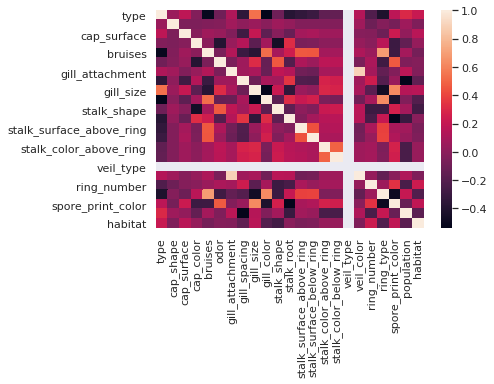

In [0]:
sns.heatmap(data_csv.corr())

when the population number getting high, type close to "1" which is poisonous

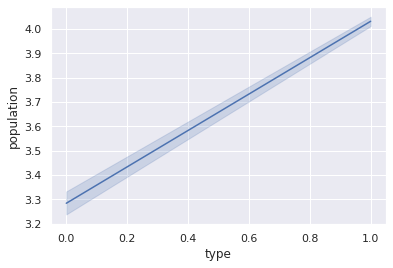

In [0]:
sns.lineplot(x="type", y="population", data=data_csv)

if habitat value > 1.15, mostly the mushroom become poisonous

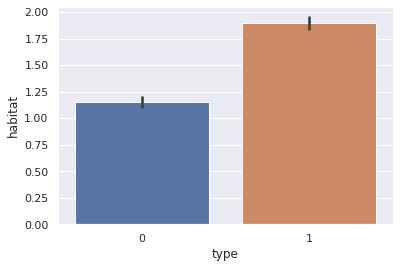

In [0]:
sns.barplot(x='type', y='habitat', data=data_csv)

the mean value of the gill color mostly edible, if gill color < 5 mushroom mostly poisonous

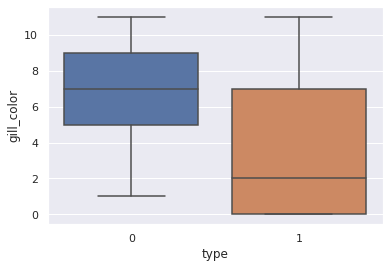

In [0]:
sns.boxplot(x='type', y='gill_color', data=data_csv)

while gill_size is increasing, the mushrooms mostly poisonous

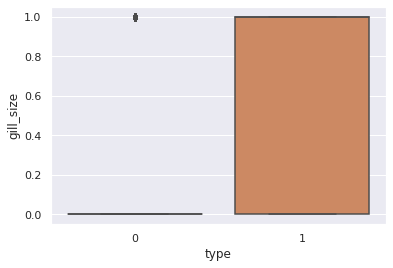

In [0]:
sns.boxplot(data_csv['type'],data_csv['gill_size'])

In [0]:
size0 = data_csv[data_csv['gill_size'] == 0]  #make a new dataset which calls zero, all data with respect to gill_size column value is 0
size1 = data_csv[data_csv['gill_size'] == 1]  #all data with respect to gill_size column value is 1

too see correlation between gill_size and gill_color 

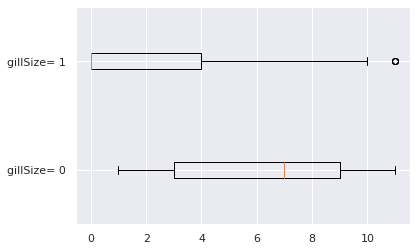

In [0]:
feature = 'gill_color' #for the feature of gill_color column

bp_data = [size0[feature], size1[feature]] #creating the boxplot_data to visualize, [x,y]: x stands for gill_color values with all zeros gill_size column, and y is gill_color values with all ones gill_size column
plt.boxplot(bp_data, vert=False, labels=['gillSize= 0', 'gillSize= 1']) #we see that, after gill_color higher than 4, gill size becomes "0" mostly
plt.show()

if spore print color is not between 4 and 1 most probably mushroom is poisonus

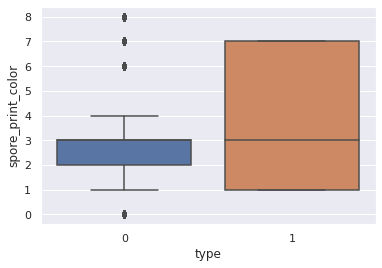

In [0]:
sns.boxplot(data_csv['type'],data_csv['spore_print_color'])

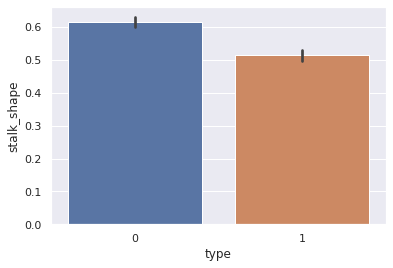

In [0]:
sns.barplot(data_csv['type'],data_csv['stalk_shape'])

#Dataset split

In [0]:
from sklearn.model_selection import train_test_split
y = data_csv["type"].values    # "type" column as numpy array.
X= data_csv.drop(["type"], axis=1).values    # All data except "type" column as numpy array.

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)    # Split data for train and test. %80 train %20 test

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 8124
Total # of sample in train dataset: 6499
Total # of sample in test dataset: 1625


#Classifications

My aim is to predict mushroom edible or not. I will use classification algorithms.

#KNN Classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2) # i get the best result with 2. for n_neighbors=5 it is 0.996, and for n_neighbors=1 it is 0.998. n_neighbors=2 is the better.
knn.fit(X_train, y_train)

knn.score(X_test,y_test)

0.9993846153846154

#KNN Cross Validation with cross validate and KFold

Feature Extraction with PCA

In [0]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
 
pca = PCA(n_components=2)      #pca with n=2
model = KNeighborsClassifier()

pca_model = Pipeline([('feature_extraction', pca), 
                      ('classification', model)])   #then creating a new model of feature exctracted version of my classification model

In [0]:
from sklearn.model_selection import cross_validate

results = cross_validate(pca_model, X, y, cv=10) #then cross validation with our new pcamodel with my datasets
results = np.mean(results['test_score'])   #average score
print(f":: Result after PCA: {results}")

#i dont know why but after feature extracted, score has decreased

:: Result after PCA: 0.8850423233296372


In [0]:
from sklearn.model_selection import KFold      
cv = KFold(n_splits=10, shuffle=True, random_state=42)   #cv is stands for the KFold attributes for 10 iterations and shuffle is true

accuracies = []
for train, test in cv.split(X):  #i calculate knn scores for 10 times splited and shuffled X with kfold
  knn = KNeighborsClassifier(n_neighbors=2) # i get the best result with 2. for n_neighbors=5 it is 0.996, and for n_neighbors=1 it is 0.998. n_neighbors=2 is the better.
  knn.fit(X[train], y[train])

  scr = knn.score(X[test], y[test])
  accuracies.append(scr)

print(f"Mean of experiment scores: {np.mean(accuracies)}")

Mean of experiment scores: 0.9995078436006036


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



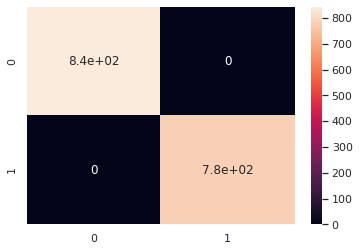

In [0]:
from sklearn.metrics import confusion_matrix, classification_report #i used confusion matrix to see the actual and the predicted table

predictionsKnn = knn.predict(X_test)              #make prediction with my test dataset
cm = confusion_matrix(predictionsKnn, y_test)     #than calculating confusion matrix according to predictions and the truth tables
sns.heatmap(cm, annot=True)                       #then draw it

print(classification_report(predictionsKnn, y_test))

#Hyper-Parameters of KNN

In [0]:
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,5))
n_neighbors = list(range(1,5))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters

print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print(f"Best Score: {gcv.best_score_}")

#and here is the hyperparamaters, since i already tried n_neighbors values manually. We got automatically here best value of n_neigbors is 2

Best leaf_size: 1
Best p: 1
Best n_neighbors: 2
Best Score: 0.951035361338835


#Naive Bayes Classifier

Naive Bayes less successful than KNN

In [0]:
from sklearn.naive_bayes import GaussianNB as NB

nbc = NB()
nbc.fit(X_train,y_train)

nbc.score(X_test,y_test)

0.9218461538461539

#Naive Bayes Cross Validation with KFold

In [0]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=20, shuffle=True, random_state=42) 

accuracies = []
for train, test in cv.split(X):
  nbc = NB()
  nbc.fit(X[train], y[train])

  scr = nbc.score(X[test], y[test])
  accuracies.append(scr)

print(f"Mean of experiment scores: {np.mean(accuracies)}")

Mean of experiment scores: 0.9208512363684775


              precision    recall  f1-score   support

           0       0.92      0.93      0.92       827
           1       0.93      0.91      0.92       798

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625



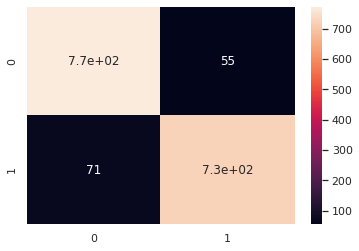

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

predictionsNB = nbc.predict(X_test) 
cm = confusion_matrix(predictionsNB, y_test)
sns.heatmap(cm, annot=True)

print(classification_report(predictionsNB, y_test))

#Hyper-Parameters of Naive Bayes

In [0]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {'var_smoothing': np.logspace(0,-9, num=100)} #the paramethers that we can change is the var_smoothing attribute and i arrange it with logspace(0,-9) and 100 iteration between them

gcv = GridSearchCV(NB(), hyperparameters, cv=10).fit(X, y)  #then fit it with gridsearch

pandas.DataFrame(gcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004676,0.000692,0.000703,0.000072,1,{'var_smoothing': 1.0},0.567036,0.682657,0.799508,0.781058,0.721675,0.742611,0.998768,0.996305,0.816502,0.912562,0.801868,0.129916,98
1,0.004892,0.000694,0.000787,0.000181,0.811131,{'var_smoothing': 0.8111308307896871},0.564576,0.683887,0.805658,0.782288,0.725369,0.747537,0.998768,0.996305,0.812808,0.895320,0.801252,0.128395,99
2,0.005169,0.000705,0.000795,0.000148,0.657933,{'var_smoothing': 0.657933224657568},0.564576,0.698647,0.810578,0.789668,0.735222,0.756158,0.998768,0.996305,0.775862,0.886700,0.801248,0.125763,100
3,0.004540,0.000464,0.000684,0.000128,0.53367,{'var_smoothing': 0.533669923120631},0.567036,0.712177,0.829028,0.798278,0.745074,0.763547,0.998768,0.996305,0.733990,0.876847,0.802105,0.124675,97
4,0.004315,0.000034,0.000640,0.000043,0.432876,{'var_smoothing': 0.43287612810830584},0.570726,0.731857,0.843788,0.810578,0.752463,0.768473,0.998768,0.996305,0.720443,0.873153,0.806656,0.123197,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.004424,0.000210,0.000638,0.000026,2.31013e-09,{'var_smoothing': 2.310129700083158e-09},0.597786,0.788438,0.979090,0.980320,0.848522,0.817734,0.809113,0.816502,0.850985,0.975369,0.846386,0.109761,48
96,0.004312,0.000058,0.000626,0.000022,1.87382e-09,{'var_smoothing': 1.873817422860387e-09},0.597786,0.788438,0.979090,0.980320,0.848522,0.817734,0.809113,0.816502,0.850985,0.975369,0.846386,0.109761,48
97,0.004283,0.000017,0.000625,0.000016,1.51991e-09,{'var_smoothing': 1.519911082952933e-09},0.597786,0.788438,0.979090,0.980320,0.848522,0.817734,0.809113,0.816502,0.850985,0.975369,0.846386,0.109761,48
98,0.004650,0.000580,0.000709,0.000153,1.23285e-09,{'var_smoothing': 1.2328467394420635e-09},0.597786,0.788438,0.979090,0.980320,0.848522,0.817734,0.809113,0.816502,0.850985,0.975369,0.846386,0.109761,48


In [0]:
print(f"Best Estimator: {gcv.best_estimator_}")
print(f"Best Parameter: {gcv.best_params_}")
print(f"Best Score: {gcv.best_score_}")

#best var_smoothing value is= 0.0023...

Best Estimator: GaussianNB(priors=None, var_smoothing=0.0023101297000831605)
Best Parameter: {'var_smoothing': 0.0023101297000831605}
Best Score: 0.8828267863959427


#Decision Tree Classifier

Decision Tree result '1.0' it is mean that decisiontree classifier always predict true. 

In [0]:
from sklearn.tree import DecisionTreeClassifier as DT

dtree = DT(criterion='entropy',random_state=42)
dtree.fit(X_train,y_train)

dtree.score(X_test,y_test)

1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



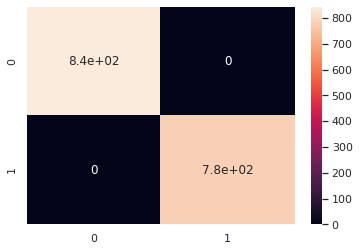

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

predictionsDT = dtree.predict(X_test) 
cm = confusion_matrix(predictionsDT, y_test)
sns.heatmap(cm, annot=True)

print(classification_report(predictionsDT, y_test))

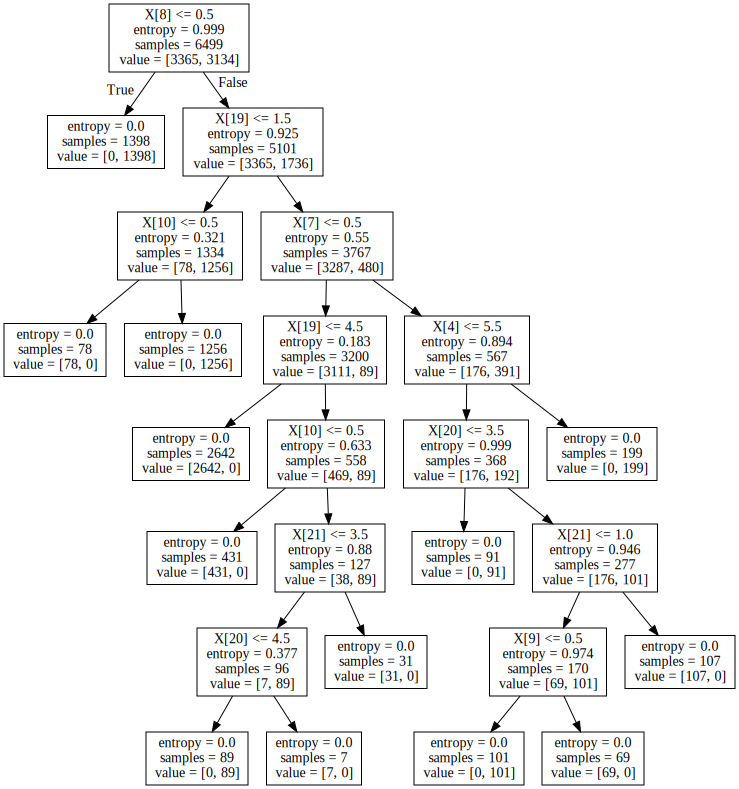

In [0]:
from sklearn import tree  #i import tree library to see features with their calculated entropies
import graphviz #to better visualize

exported_tree = tree.export_graphviz(dtree) 
tree_plot = graphviz.Source(exported_tree) 

tree_plot

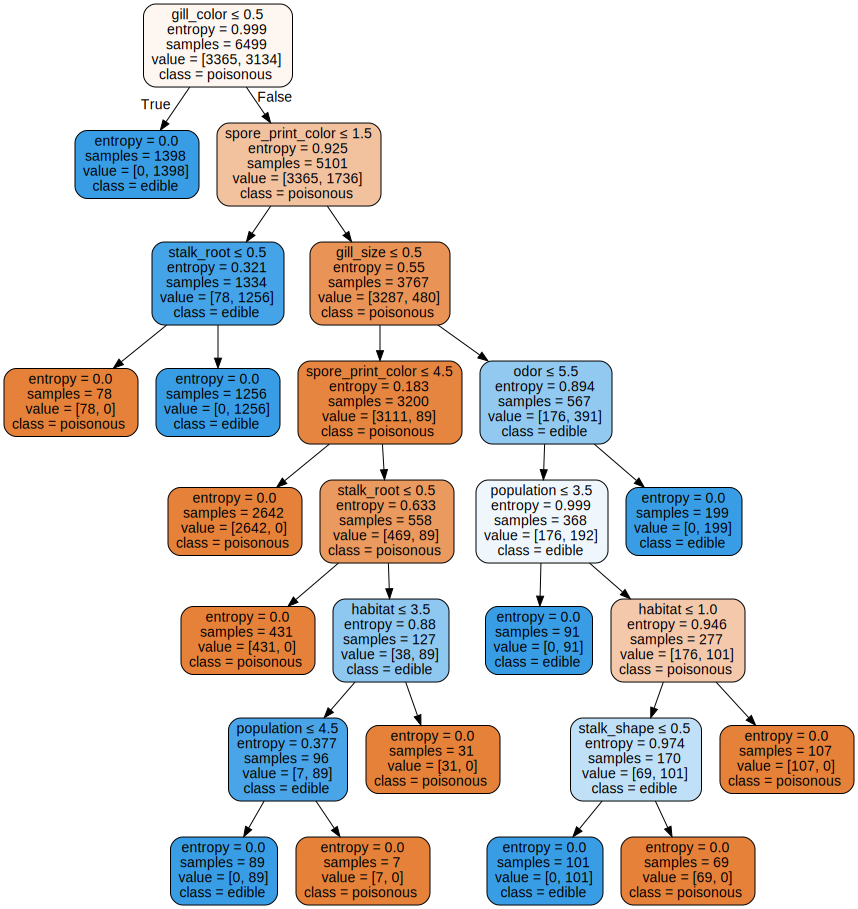

In [0]:
f_name=data_csv.drop('type',axis=1).columns

exported_tree = tree.export_graphviz(dtree, out_file=None,
                               feature_names=f_name,  #all features except our label stun which is "type"
                               class_names=['poisonous', 'edible'], #and the class names are edible or poisonous, i check the results then i decide this order first poisonous then edible
                               filled=True, rounded=True,
                               special_characters=True)

tree_plot = graphviz.Source(exported_tree)  
tree_plot

#Decision Tree Cross Validation with KFold

Feature Selection

In [0]:
from sklearn.feature_selection import SelectFromModel

best_features = SelectFromModel(dtree)  #it is directly choose best features in dtree model
best_features.fit(X, y) #then i fit it with the best features

transformedX = best_features.transform(X) #then transform x into best features way

print(f"Old Shape: {X.shape}, New shape: {transformedX.shape}")

Old Shape: (8124, 22), New shape: (8124, 4)


In [0]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=50, shuffle=True, random_state=42) 

accuracies = []
for train, test in cv.split(X):
  dtree = DT(criterion='entropy',random_state=42)
  dtree.fit(transformedX[train], y[train])

  scr = dtree.score(transformedX[test], y[test])
  accuracies.append(scr)

print(f"Mean of experiment scores: {np.mean(accuracies)}")

#again i dont know why but after feature selection, score has decreased 

Mean of experiment scores: 0.9862144967052942


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        85
           1       1.00      0.97      0.99        77

    accuracy                           0.99       162
   macro avg       0.99      0.99      0.99       162
weighted avg       0.99      0.99      0.99       162



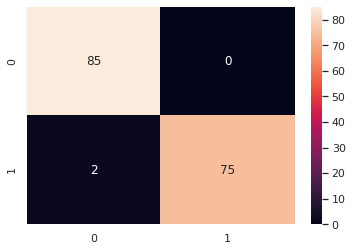

In [0]:
predictionsDT = dtree.predict(transformedX[test]) 
cm = confusion_matrix(predictionsDT, y[test])
sns.heatmap(cm, annot=True)

print(classification_report(predictionsDT,  y[test]))

#Hyper-Parameters of Decision Tree

In [0]:
parameters = {'max_depth': range(1,10), 
              'min_samples_split': range(2,10), 
              'min_samples_leaf': range(2, 10)}

gcv = GridSearchCV(DT(), parameters, cv=10).fit(transformedX, y)

pandas.DataFrame(gcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001512,0.000298,0.000372,0.000032,1,2,2,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.504305,0.675277,0.742927,0.738007,0.747537,0.800493,0.998768,0.996305,0.811576,0.887931,0.790313,0.140647,513
1,0.001418,0.000024,0.000354,0.000011,1,2,3,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.504305,0.675277,0.742927,0.738007,0.747537,0.800493,0.998768,0.996305,0.811576,0.887931,0.790313,0.140647,513
2,0.001410,0.000026,0.000363,0.000012,1,2,4,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.504305,0.675277,0.742927,0.738007,0.747537,0.800493,0.998768,0.996305,0.811576,0.887931,0.790313,0.140647,513
3,0.001418,0.000028,0.000373,0.000029,1,2,5,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.504305,0.675277,0.742927,0.738007,0.747537,0.800493,0.998768,0.996305,0.811576,0.887931,0.790313,0.140647,513
4,0.001421,0.000016,0.000364,0.000017,1,2,6,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.504305,0.675277,0.742927,0.738007,0.747537,0.800493,0.998768,0.996305,0.811576,0.887931,0.790313,0.140647,513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,0.002402,0.000058,0.000361,0.000014,9,9,5,"{'max_depth': 9, 'min_samples_leaf': 9, 'min_s...",0.654367,0.928659,0.987700,0.995080,0.991379,0.997537,1.000000,1.000000,0.884236,0.995074,0.943403,0.103054,141
572,0.002425,0.000087,0.000374,0.000034,9,9,6,"{'max_depth': 9, 'min_samples_leaf': 9, 'min_s...",0.654367,0.928659,0.987700,0.995080,0.991379,0.997537,1.000000,1.000000,0.928571,0.995074,0.947837,0.101353,45
573,0.002419,0.000040,0.000363,0.000019,9,9,7,"{'max_depth': 9, 'min_samples_leaf': 9, 'min_s...",0.654367,0.928659,0.987700,0.995080,0.991379,0.997537,1.000000,1.000000,0.928571,0.995074,0.947837,0.101353,45
574,0.002413,0.000095,0.000370,0.000027,9,9,8,"{'max_depth': 9, 'min_samples_leaf': 9, 'min_s...",0.654367,0.928659,0.987700,0.995080,0.991379,0.997537,1.000000,1.000000,0.928571,0.995074,0.947837,0.101353,45


In [0]:
print(f"Best Estimator: {gcv.best_estimator_}")
print(f"Best Parameter: {gcv.best_params_}")
print(f"Best Score: {gcv.best_score_}")

Best Estimator: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Best Parameter: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.951035361338835
